In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open("411.image-recognition_experiments.json", "r") as inf:
    data = json.load(inf)
data.keys()

dict_keys(['_invocations', '_metrics', 'begin_time', 'config', 'end_time', 'result_bucket'])

In [6]:
latencies = []
for _, subdata in data["_invocations"]["411.image-recognition-python-3.7"].items():
    latencies.append(subdata["times"]["benchmark"])
    
latencies = np.asarray(latencies)

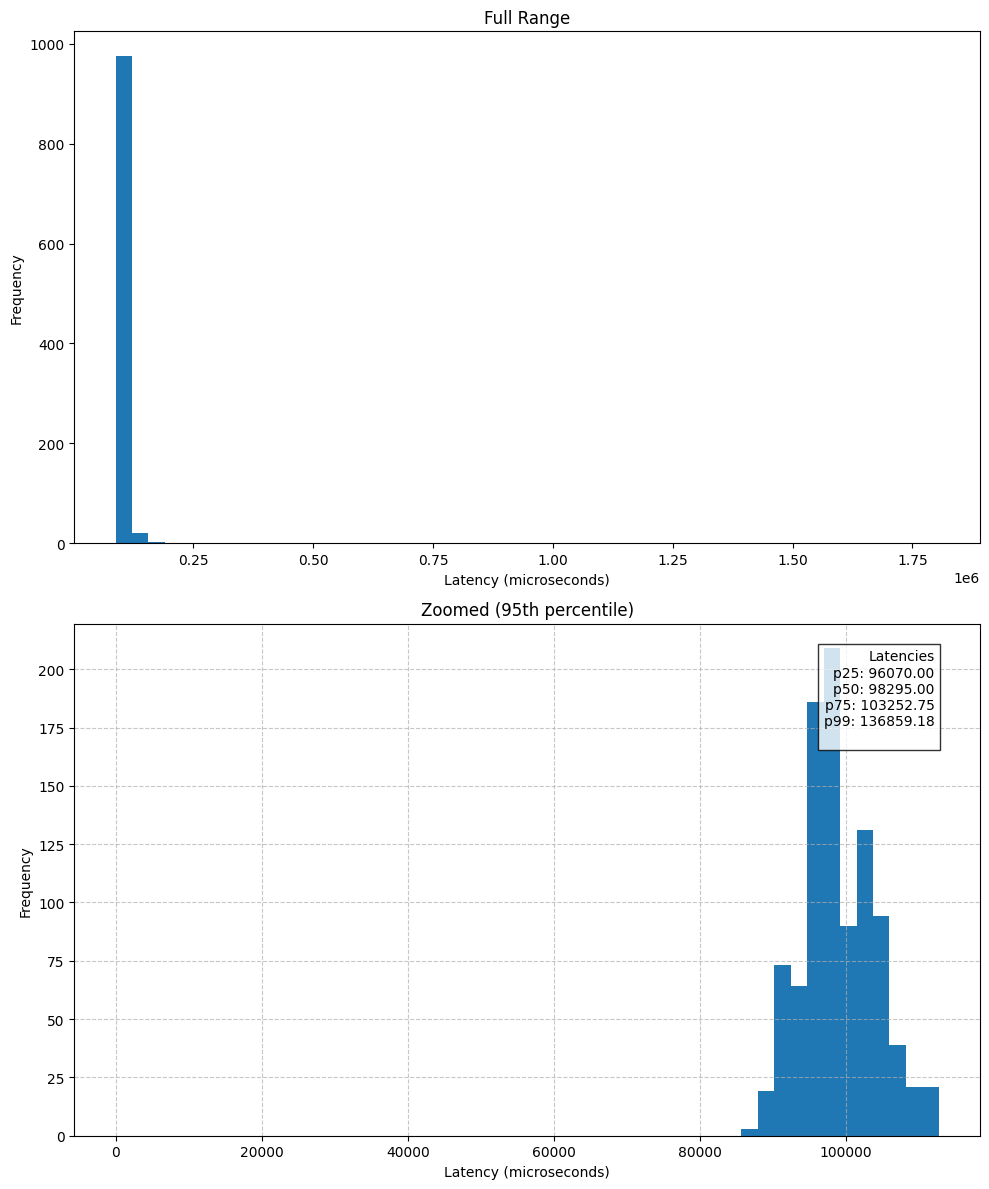

In [10]:
title = 'Histogram 411.image-recognition latencies'

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
ax1.hist(latencies, bins=50)
ax1.set_xlabel("Latency (microseconds)")
ax1.set_ylabel("Frequency")
ax1.set_title('Full Range')

ax2.hist(latencies, bins=50, range=(0, np.percentile(latencies, 95)))
ax2.set_xlabel("Latency (microseconds)")
ax2.set_ylabel("Frequency")
ax2.set_title('Zoomed (95th percentile)')

plt.grid(True, linestyle='--', alpha=0.7)

latency_median = np.median(latencies)
latency_25 = np.percentile(latencies, 25)
latency_75 = np.percentile(latencies, 75)
latency_99 = np.percentile(latencies, 99)

stats = f"""Latencies
p25: {latency_25:.2f}
p50: {latency_median:.2f}
p75: {latency_75:.2f}
p99: {latency_99:.2f}
"""

plt.text(0.95, 0.95, stats, transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()
